82.992

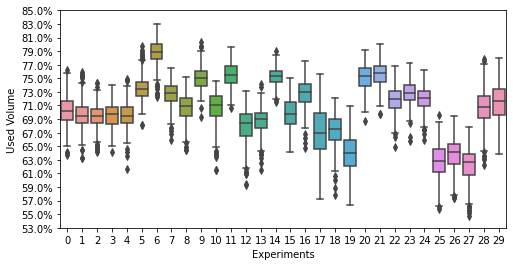

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
import numpy as np
import glob, json, os

def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/simulation/" + str(ID) + "s*.json")[0]
    return json.load(open(filepath))
all_data = []
labels = []
for i in range(30):
    data = pd.DataFrame(getDFrom(i)).assign(Experiment=i)
    data["used_volume"] = data.apply(lambda x: round(x["used_volume"]*100, 3), axis=1)
    all_data.append(data)
    labels.append("E"+ str(i))

cdf = pd.concat(all_data)

#mdf = pd.melt(cdf, id_vars=['Location'], var_name=["used_volume"])
#mdf
plt.figure(figsize=(8,4))
plot = sns.boxplot(x="Experiment", y="used_volume", data=cdf)
plt.yticks(np.arange(round(cdf.used_volume.min()*0.96, 0), round(cdf.used_volume.max()*1.04, 0), step=2))
plot.set(xlabel="Experiments", ylabel = "Used Volume")
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("data.pdf", dpi=300)
cdf.used_volume.max()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/" + str(ID) + "bestSolsFilte*.json")[0]
    return json.load(open(filepath))

bestSol28 = sorted(getDFrom(28)["volume"][0]["placed"], key=lambda x: x["id_or"])

massCentersWithWeight = list(map(lambda x:
                 np.append(x["mass_center"], x["weight"]).tolist(), bestSol28))
massCentersWithWeight = np.array(massCentersWithWeight)
m = massCentersWithWeight[:,3]
x = massCentersWithWeight[:,0]
cgx = np.sum(massCentersWithWeight[:,0]*m)/np.sum(m)
y =massCentersWithWeight[:,1]
cgy = np.sum(massCentersWithWeight[:,1]*m)/np.sum(m)
z = massCentersWithWeight[:,2]
cgz = np.sum(massCentersWithWeight[:,2]*m)/np.sum(m)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=m)

ax.scatter(cgx, cgy, cgz, color='k', marker='+', s=1e4)
plt.title('3 Dimensional Center of Gravity');



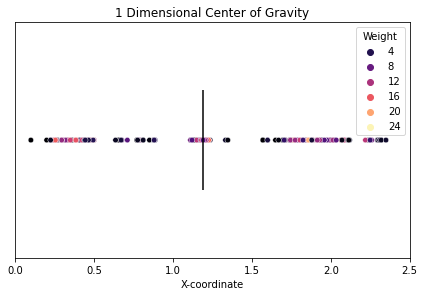

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/" + str(ID) + "bestSolsFilte*.json")[0]
    return json.load(open(filepath))

bestSol28 = sorted(getDFrom(28)["volume"][0]["placed"], key=lambda x: x["id_or"])

massCentersWithWeight = list(map(lambda x:
                 np.append(x["mass_center"], x["weight"]).tolist(), bestSol28))
massCentersWithWeight = np.array(massCentersWithWeight)
m = massCentersWithWeight[:,3]
x = massCentersWithWeight[:,0]
cgx = np.sum(massCentersWithWeight[:,0]*m)/np.sum(m)
yG = np.zeros(len(m))


dataset = pd.DataFrame({"X-coordinate": x, "Y-coordinate": yG, "Weight": m})
sns.scatterplot(x="X-coordinate", y="Y-coordinate", hue="Weight", s=30, palette="magma", data=dataset)
plt.scatter(cgx, 0, color='k', marker='|', s=1e4)
plt.gca().set_yticks([])
plt.ylabel("")
plt.xlim(0,2.5)
plt.tight_layout()
plt.title('1 Dimensional Center of Mass')
plt.savefig("x-mc.pdf", bbox_inches='tight',dpi=300)


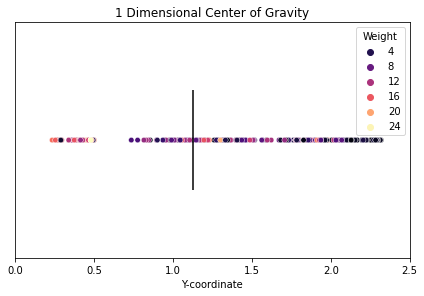

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/" + str(ID) + "bestSolsFilte*.json")[0]
    return json.load(open(filepath))

bestSol28 = sorted(getDFrom(28)["volume"][0]["placed"], key=lambda x: x["id_or"])

massCentersWithWeight = list(map(lambda x:
                 np.append(x["mass_center"], x["weight"]).tolist(), bestSol28))
massCentersWithWeight = np.array(massCentersWithWeight)
m = massCentersWithWeight[:,3]
y = massCentersWithWeight[:,1]
cgy = np.sum(massCentersWithWeight[:,1]*m)/np.sum(m)
yG = np.zeros(len(m))


dataset = pd.DataFrame({"Y-coordinate": y, "N-coordinate": yG, "Weight": m})
sns.scatterplot(x="Y-coordinate", y="N-coordinate", hue="Weight", s=30, palette="magma", data=dataset)
plt.scatter(cgy, 0, color='k', marker='|', s=1e4)
plt.gca().set_yticks([])
plt.ylabel("")
plt.xlim(0,2.5)
plt.tight_layout()
plt.title('1 Dimensional Center of Mass')
plt.savefig("y-mc-28.pdf", bbox_inches='tight',dpi=300)

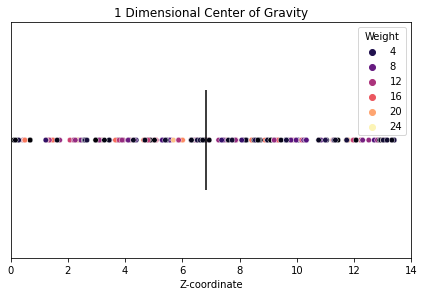

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/" + str(ID) + "bestSolsFilte*.json")[0]
    return json.load(open(filepath))

bestSol28 = sorted(getDFrom(28)["volume"][0]["placed"], key=lambda x: x["id_or"])

massCentersWithWeight = list(map(lambda x:
                 np.append(x["mass_center"], x["weight"]).tolist(), bestSol28))
massCentersWithWeight = np.array(massCentersWithWeight)
m = massCentersWithWeight[:,3]
z = massCentersWithWeight[:,2]
cgz = np.sum(massCentersWithWeight[:,2]*m)/np.sum(m)
yG = np.zeros(len(m))


dataset = pd.DataFrame({"Z-coordinate": z, "N-coordinate": yG, "Weight": m})
sns.scatterplot(x="Z-coordinate", y="N-coordinate", hue="Weight", s=30, palette="magma", data=dataset)
plt.scatter(cgz, 0, color='k', marker='|', s=1e4)
plt.gca().set_yticks([])
plt.ylabel("")
plt.xlim(0,14)
plt.tight_layout()
plt.title('1 Dimensional Center of Mass')
plt.savefig("z-mc-28.pdf", bbox_inches='tight',dpi=300)

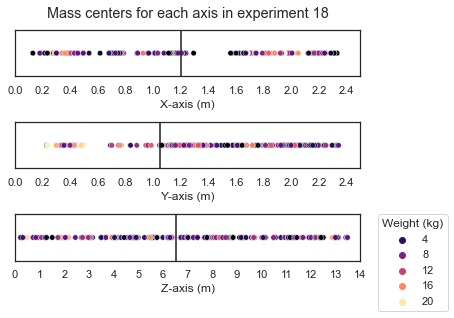

In [19]:
Id = 18
def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/" + str(ID) + "bestSolsFilte*.json")[0]
    return json.load(open(filepath))

bestSol = sorted(getDFrom(Id)["volume"][0]["placed"], key=lambda x: x["id_or"])

massCentersWithWeight = list(map(lambda x:
                 np.append(x["mass_center"], x["weight"]).tolist(), bestSol))
massCentersWithWeight = np.array(massCentersWithWeight)
fig, (ax0, ax1, ax2) = plt.subplots(3)
m = massCentersWithWeight[:,3]
x = massCentersWithWeight[:,0]
cgx = np.sum(massCentersWithWeight[:,0]*m)/np.sum(m)
y = massCentersWithWeight[:,1]
cgy = np.sum(massCentersWithWeight[:,1]*m)/np.sum(m)
z = massCentersWithWeight[:,2]
cgz = np.sum(massCentersWithWeight[:,2]*m)/np.sum(m)
yG = np.zeros(len(m))

fig.suptitle("Mass centers for each axis in experiment "+str(Id))
datasetX = pd.DataFrame({"X-coordinate": x, "Y-coordinate": yG, "Weight": m})
sns.scatterplot(ax=ax0, x="X-coordinate", y="Y-coordinate", hue="Weight", s=30, palette="magma", data=datasetX)
ax0.scatter(cgx, 0, color='k', marker='|', s=1e4)
ax0.set_yticks([])
ax0.get_legend().remove()
ax0.set_xlim(0,2.5)
ax0.set_xticks(np.arange(0, 2.51, step=0.2))
ax0.set(xlabel="X-axis (m)", ylabel="")

datasetY = pd.DataFrame({"Y-coordinate": y, "N-coordinate": yG, "Weight": m})
sns.scatterplot(ax=ax1, x="Y-coordinate", y="N-coordinate", hue="Weight", s=30, palette="magma", data=datasetY)
ax1.scatter(cgy, 0, color='k', marker='|', s=1e4)
ax1.set_yticks([])
ax1.get_legend().remove()
ax1.set_xlim(0,2.5)
ax1.set_xticks(np.arange(0, 2.51, step=0.2))
ax1.set(xlabel="Y-axis (m)", ylabel="")


datasetZ = pd.DataFrame({"Z-coordinate": z, "N-coordinate": yG, "Weight": m})
sns.scatterplot(ax=ax2, x="Z-coordinate", y="N-coordinate", hue="Weight", s=30, palette="magma", data=datasetZ)
ax2.scatter(cgz, 0, color='k', marker='|', s=1e4)
ax2.set_yticks([])
ax2.set_xticks(np.arange(0, 14.1, step=1))
ax2.set(xlabel="Z-axis (m)", ylabel="")
plt.xlim(0,14)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1,
                    hspace=1)
plt.legend(bbox_to_anchor=(1.05, 1),
           borderaxespad=0, title="Weight (kg)")
plt.savefig("CombinedMC-"+str(Id)+".pdf", bbox_inches='tight',dpi=300)

<Figure size 1080x1080 with 0 Axes>

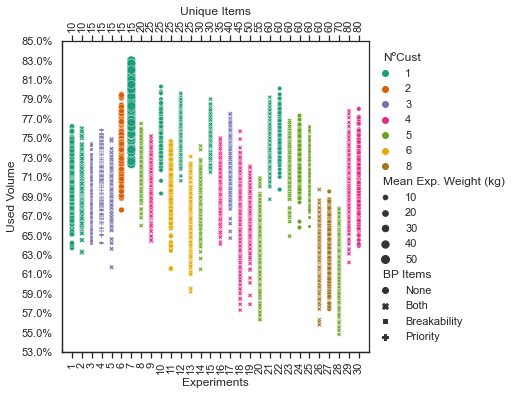

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
import numpy as np
import glob, json, os

def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/simulation/" + str(ID) + "s*.json")[0]
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    nDst = int(filepath2.split("Datasets/")[1].split("-")[5][3])
    b = int(filepath2.split("Datasets/")[1].split("-")[8][1])
    p = int(filepath2.split("Datasets/")[1].split("-")[9][1])
    return json.load(open(filepath)), nDst, b, p


def getUnique(ID):
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    unique = int("".join(filepath2.split("Datasets/")[1].split("-")[1][1:]))
    return unique

def get(ID):
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    unique = int(filepath2.split("Datasets/")[1].split("-")[0][0])
    return unique


all_data = []
labels = []

def translateType(b, p):
    if b > 0 and p == 0:
        return "Breakability"
    elif b == 0 and p > 0:
        return "Priority"
    elif b > 0 and p > 0:
        return "Both"
    else:
        return "None"

for i in range(30):
    data, nDst, b, p = getDFrom(i)
    dataset = pd.DataFrame(data).assign(Experiment=i+1)
    dataset["used_volume"] = dataset.apply(lambda x: round(x["used_volume"]*100, 1), axis=1)
    dataset["NºCust"]= dataset.apply(lambda x: nDst, axis=1)
    dataset["BP Items"] = dataset.apply(lambda x: translateType(b, p), axis=1)
    dataset["Mean Exp. Weight (kg)"] = dataset.apply(lambda x: ((x["n_placed"]*x["p_mean_weight"])+(x["n_discard"]*x["d_mean_weight"]))/(x["n_placed"]+x["n_discard"]), axis=1)
    all_data.append(dataset)

cdf = pd.concat(all_data)
sns.set_theme(style="white")
fig = plt.figure(figsize=(15,15))
plot = sns.relplot(x="Experiment", y="used_volume", palette="Dark2", size="Mean Exp. Weight (kg)", style="BP Items", hue="NºCust", data=cdf)
plt.yticks(np.arange(round(cdf.used_volume.min()*0.96, 0), round(cdf.used_volume.max()*1.04, 0), step=2))
plt.xticks([i+1 for i in range(30)])
plt.xlim(0,31)
plt.xticks(rotation = 90)

plt2 = plt.twiny()
new_tick_locations = list(range(0, 30))
plt2.set_xticks([i+1 for i in range(30)])
plt2.set_xlim(0,31)
plt2.set_xticklabels([getUnique(i) for i in new_tick_locations])
plt.xticks(rotation = 90)
plt2.set_xlabel("Unique Items")
plot.set(xlabel="Experiments", ylabel = "Used Volume")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.gcf().subplots_adjust(bottom=0.1)
plt.savefig("OverviewExp.pdf", bbox_inches='tight',dpi=300)

<Figure size 1080x1080 with 0 Axes>

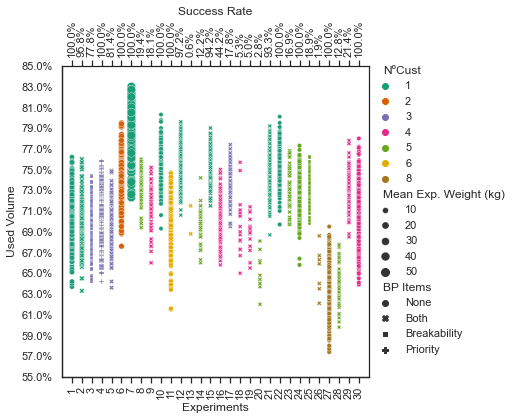

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
import numpy as np
import glob, json, os

def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/simulation/" + str(ID) + "s*.json")[0]
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    nDst = int(filepath2.split("Datasets/")[1].split("-")[5][3])
    b = int(filepath2.split("Datasets/")[1].split("-")[8][1])
    p = int(filepath2.split("Datasets/")[1].split("-")[9][1])
    return json.load(open(filepath)), nDst, b, p


def getUnique(ID):
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    unique = int("".join(filepath2.split("Datasets/")[1].split("-")[1][1:]))
    return unique

def get(ID):
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    unique = int(filepath2.split("Datasets/")[1].split("-")[0][0])
    return unique


all_data = []
labels = []

def translateType(b, p):
    if b > 0 and p == 0:
        return "Breakability"
    elif b == 0 and p > 0:
        return "Priority"
    elif b > 0 and p > 0:
        return "Both"
    else:
        return "None"

success = []
for i in range(30):
    data, nDst, b, p = getDFrom(i)
    dataset = pd.DataFrame(data).assign(Experiment=i+1)
    dataset["used_volume"] = dataset.apply(lambda x: round(x["used_volume"]*100, 1), axis=1)
    dataset["NºCust"]= dataset.apply(lambda x: nDst, axis=1)
    dataset["BP Items"] = dataset.apply(lambda x: translateType(b, p), axis=1)
    dataset["valid"] = dataset.apply(lambda x: x["hs_cond"] and x["p_cond"], axis=1)
    dataset["successful"] = len(dataset[dataset.valid==1])/len(dataset)
    success.append(len(dataset[dataset.valid==1])/len(dataset))
    dataset["Mean Exp. Weight (kg)"] = dataset.apply(lambda x: ((x["n_placed"]*x["p_mean_weight"])+(x["n_discard"]*x["d_mean_weight"]))/(x["n_placed"]+x["n_discard"]), axis=1)
    all_data.append(dataset[dataset.valid==1])

cdf = pd.concat(all_data)
sns.set_theme(style="white")
fig = plt.figure(figsize=(15,15))
plot = sns.relplot(x="Experiment", y="used_volume", palette="Dark2",  style="BP Items", size="Mean Exp. Weight (kg)", hue="NºCust", data=cdf)
plt.yticks(np.arange(round(cdf.used_volume.min()*0.96, 0), round(cdf.used_volume.max()*1.04, 0), step=2))
plt.xticks([i+1 for i in range(30)])
plt.xlim(0,31)
plt.xticks(rotation = 90)

plt2 = plt.twiny()
new_tick_locations = list(range(0, 30))
plt2.set_xticks([i+1 for i in range(30)])
plt2.set_xlim(0,31)
plt2.set_xticklabels(['{:,.1%}'.format(success[i]) for i in new_tick_locations])
plt.xticks(rotation = 90)
plt2.set_xlabel("Success Rate")
plot.set(xlabel="Experiments", ylabel = "Used Volume")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.gcf().subplots_adjust(bottom=0.1)
plt.savefig("SucessfulWithVolume.pdf", bbox_inches='tight',dpi=300)

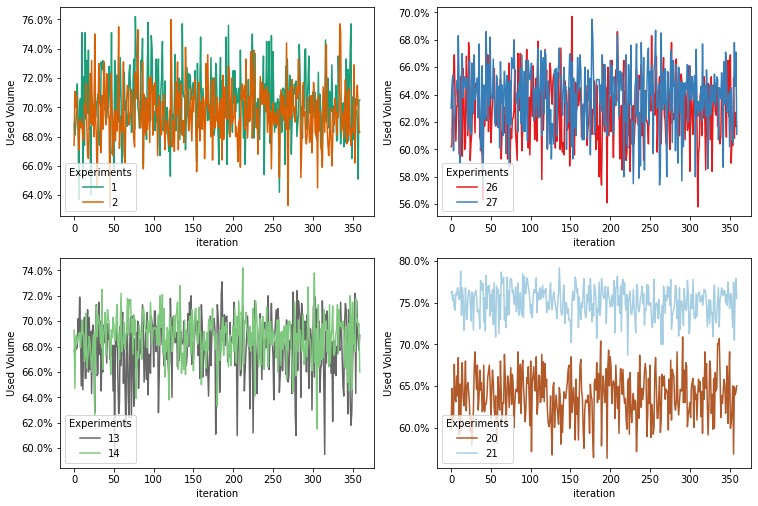

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
import numpy as np



def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/simulation/" + str(ID) + "s*.json")[0]
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    nDst = int(filepath2.split("Datasets/")[1].split("-")[5][3])
    b = int(filepath2.split("Datasets/")[1].split("-")[8][1])
    p = int(filepath2.split("Datasets/")[1].split("-")[9][1])
    return json.load(open(filepath)), nDst, b, p


def getUnique(ID):
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    unique = int("".join(filepath2.split("Datasets/")[1].split("-")[1][1:]))
    return unique

def get(ID):
    filepath2 = glob.glob(os.path.abspath('') + "/../../scenarios/packetsDatasets/" + str(ID) + "-*.json")[0]
    unique = int(filepath2.split("Datasets/")[1].split("-")[0][0])
    return unique


all_data1 = []
all_data2 = []
all_data3 = []
all_data4 = []

labels = []

def translateType(b, p):
    if b > 0 and p == 0:
        return "Breakability"
    elif b == 0 and p > 0:
        return "Priority"
    elif b > 0 and p > 0:
        return "Both"
    else:
        return "None"

for i in range(0, 2):
    data, nDst, b, p = getDFrom(i)
    dataset = pd.DataFrame(data).assign(Experiment=i+1)
    dataset["Used Volume"] = dataset.apply(lambda x: round(x["used_volume"]*100, 1), axis=1)
    dataset["NºCust"]= dataset.apply(lambda x: nDst, axis=1)
    dataset["BP Items"] = dataset.apply(lambda x: translateType(b, p), axis=1)
    dataset["mean_weight"] = dataset.apply(lambda x: ((x["n_placed"]*x["p_mean_weight"])+(x["n_discard"]*x["d_mean_weight"]))/(x["n_placed"]+x["n_discard"]), axis=1)
    all_data1.append(dataset)
for i in range(25, 27):
    data, nDst, b, p = getDFrom(i)
    dataset = pd.DataFrame(data).assign(Experiment=i+1)
    dataset["Used Volume"] = dataset.apply(lambda x: round(x["used_volume"]*100, 1), axis=1)
    dataset["NºCust"]= dataset.apply(lambda x: nDst, axis=1)
    dataset["BP Items"] = dataset.apply(lambda x: translateType(b, p), axis=1)
    dataset["mean_weight"] = dataset.apply(lambda x: ((x["n_placed"]*x["p_mean_weight"])+(x["n_discard"]*x["d_mean_weight"]))/(x["n_placed"]+x["n_discard"]), axis=1)
    all_data2.append(dataset)
for i in range(12, 14):
    data, nDst, b, p = getDFrom(i)
    dataset = pd.DataFrame(data).assign(Experiment=i+1)
    dataset["Used Volume"] = dataset.apply(lambda x: round(x["used_volume"]*100, 1), axis=1)
    dataset["NºCust"]= dataset.apply(lambda x: nDst, axis=1)
    dataset["BP Items"] = dataset.apply(lambda x: translateType(b, p), axis=1)
    dataset["mean_weight"] = dataset.apply(lambda x: ((x["n_placed"]*x["p_mean_weight"])+(x["n_discard"]*x["d_mean_weight"]))/(x["n_placed"]+x["n_discard"]), axis=1)
    all_data3.append(dataset)
for i in range(19, 21):
    data, nDst, b, p = getDFrom(i)
    dataset = pd.DataFrame(data).assign(Experiment=i+1)
    dataset["Used Volume"] = dataset.apply(lambda x: round(x["used_volume"]*100, 1), axis=1)
    dataset["NºCust"]= dataset.apply(lambda x: nDst, axis=1)
    dataset["BP Items"] = dataset.apply(lambda x: translateType(b, p), axis=1)
    dataset["mean_weight"] = dataset.apply(lambda x: ((x["n_placed"]*x["p_mean_weight"])+(x["n_discard"]*x["d_mean_weight"]))/(x["n_placed"]+x["n_discard"]), axis=1)
    all_data4.append(dataset)

cdf1 = pd.concat(all_data1)
cdf2 = pd.concat(all_data2)
cdf3 = pd.concat(all_data3)
cdf4 = pd.concat(all_data4)


fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(12,8))


sns.lineplot(ax=ax0, x="iteration", y="Used Volume", hue="Experiment" , palette="Dark2", data=cdf1)
sns.lineplot(ax=ax1, x="iteration", y="Used Volume", hue="Experiment" , palette="Set1", data=cdf2)
sns.lineplot(ax=ax2, x="iteration", y="Used Volume", hue="Experiment" , palette="Accent_r", data=cdf3)
sns.lineplot(ax=ax3, x="iteration", y="Used Volume", hue="Experiment" , palette="Paired_r", data=cdf4)
ax0.yaxis.set_major_formatter(PercentFormatter(100))
ax0.legend(loc="lower left", title="Experiments")
ax1.yaxis.set_major_formatter(PercentFormatter(100))
ax1.legend(loc="lower left", title="Experiments")
ax2.yaxis.set_major_formatter(PercentFormatter(100))
ax2.legend(loc="lower left", title="Experiments")
ax3.yaxis.set_major_formatter(PercentFormatter(100))
ax3.legend(loc="lower left", title="Experiments")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)

plt.savefig("iterationVSvolume.pdf", bbox_inches='tight',dpi=300)


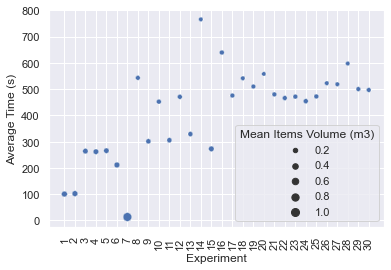

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
import numpy as np
import glob, json, os

def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/simulation/" + str(ID) + "s*.json")[0]
    return json.load(open(filepath))


all_data = []
labels = []

for i in range(30):
    data = getDFrom(i)
    dataset = pd.DataFrame(data).assign(Experiment=i+1)
    dataset["time"] = dataset.apply(lambda x: round(float(x["time"]), 0), axis=1)
    dataset["Average Time"] = dataset.time.mean()
    dataset["mean_items_volume"] = round(dataset.p_mean_volume.mean(), 2)
    all_data.append(dataset)

cdf = pd.concat(all_data)
sns.set_theme(style="darkgrid")
sns.scatterplot(x="Experiment", y="Average Time", palette="Dark2", size="mean_items_volume", data=cdf)
plt.xticks(np.arange(1, 31, step=1))
plt.xticks(rotation = 90)
plt.ylabel("Average Time (s)")
plt.legend(title="Mean Items Volume (m3)")
plt.savefig("timeExp.pdf", bbox_inches='tight',dpi=300)

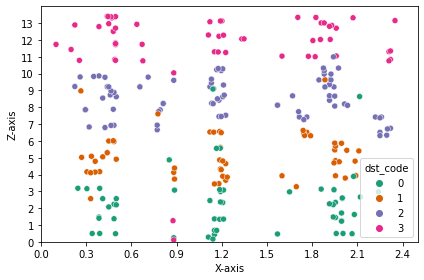

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
import numpy as np
import glob, json, os
Id = 28
def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/" + str(ID) + "bestSolsFilte*.json")[0]
    return json.load(open(filepath))

bestSol = sorted(getDFrom(Id)["volume"][0]["placed"], key=lambda x: x["id_or"])
dataset = pd.DataFrame(bestSol)
dataset["Z-axis"] = dataset.apply(lambda x: x["mass_center"][2], axis=1)
dataset["X-axis"] = dataset.apply(lambda x: x["mass_center"][0], axis=1)
sns.scatterplot(x="X-axis", y="Z-axis", hue="dst_code", palette="Dark2", data=dataset)
plt.xlim(0, 2.5)
plt.ylim(0, 14)
plt.xticks(np.arange(0, 2.5, step=0.3))
plt.yticks(np.arange(0, 14, step=1))
plt.tight_layout()



plt.savefig("clusterization"+ str(Id) +".pdf", bbox_inches='tight',dpi=300)

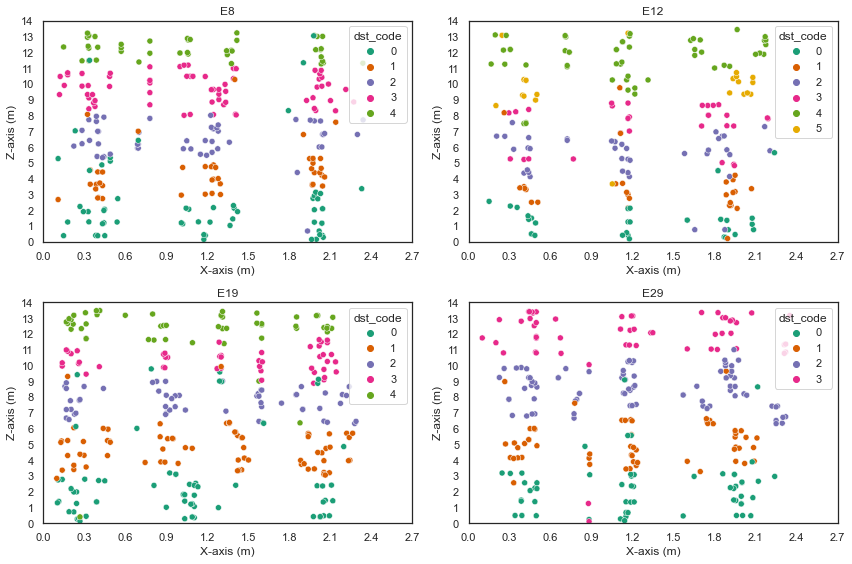

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
import numpy as np
import glob, json, os
Id = 7
def getDFrom(ID):
    filepath = glob.glob(os.path.abspath('') + "/../../scenarios/results/" + str(ID) + "bestSolsFilte*.json")[0]
    return json.load(open(filepath))

bestSol0 = sorted(getDFrom(Id)["volume"][0]["placed"], key=lambda x: x["id_or"])
dataset0 = pd.DataFrame(bestSol0)
dataset0["Z-axis"] = dataset0.apply(lambda x: x["mass_center"][2], axis=1)
dataset0["X-axis"] = dataset0.apply(lambda x: x["mass_center"][0], axis=1)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(12,8))

sns.scatterplot(ax=ax0, x="X-axis", y="Z-axis", hue="dst_code", palette="Dark2", data=dataset0)
ax0.set_xlim(0, 2.5)
ax0.set_ylim(0, 14)
ax0.set_ylabel("Z-axis (m)")
ax0.set_xlabel("X-axis (m)")
ax0.set_xticks(np.arange(0, 3, step=0.3))
ax0.set_yticks(np.arange(0, 15, step=1))
ax0.set_title("E"+str(Id+1))
ax0.legend(loc="upper right", title="dst_code")
plt.tight_layout()

bestSol1 = sorted(getDFrom(Id*2-2)["volume"][0]["placed"], key=lambda x: x["id_or"])
dataset1 = pd.DataFrame(bestSol1)
dataset1["Z-axis"] = dataset1.apply(lambda x: x["mass_center"][2], axis=1)
dataset1["X-axis"] = dataset1.apply(lambda x: x["mass_center"][0], axis=1)

sns.scatterplot(ax=ax1, x="X-axis", y="Z-axis", hue="dst_code", palette="Dark2", data=dataset1)
ax1.set_xlim(0, 2.5)
ax1.set_ylim(0, 14)
ax1.set_ylabel("Z-axis (m)")
ax1.set_xlabel("X-axis (m)")
ax1.set_xticks(np.arange(0, 3, step=0.3))
ax1.set_yticks(np.arange(0, 15, step=1))
ax1.set_title("E"+str(Id*2-2))
ax1.legend(loc="upper right", title="dst_code")
plt.tight_layout()



bestSol2 = sorted(getDFrom(Id*3-2)["volume"][0]["placed"], key=lambda x: x["id_or"])
dataset2 = pd.DataFrame(bestSol2)
dataset2["Z-axis"] = dataset2.apply(lambda x: x["mass_center"][2], axis=1)
dataset2["X-axis"] = dataset2.apply(lambda x: x["mass_center"][0], axis=1)

sns.scatterplot(ax=ax2, x="X-axis", y="Z-axis", hue="dst_code", palette="Dark2", data=dataset2)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(0, 14)
ax2.set_ylabel("Z-axis (m)")
ax2.set_xlabel("X-axis (m)")
ax2.set_title("E"+str(Id*3-2))
ax2.set_xticks(np.arange(0, 3, step=0.3))
ax2.set_yticks(np.arange(0, 15, step=1))
ax2.legend(loc="upper right", title="dst_code")
plt.tight_layout()



bestSol3 = sorted(getDFrom(Id*4)["volume"][0]["placed"], key=lambda x: x["id_or"])
dataset3 = pd.DataFrame(bestSol3)
dataset3["Z-axis"] = dataset3.apply(lambda x: x["mass_center"][2], axis=1)
dataset3["X-axis"] = dataset3.apply(lambda x: x["mass_center"][0], axis=1)

sns.scatterplot(ax=ax3, x="X-axis", y="Z-axis", hue="dst_code", palette="Dark2", data=dataset3)
ax3.set_xlim(0, 2.5)
ax3.set_ylim(0, 14)
ax3.set_title("E"+str(Id*4+1))
ax3.set_ylabel("Z-axis (m)")
ax3.set_xlabel("X-axis (m)")
ax3.set_xticks(np.arange(0, 3, step=0.3))
ax3.set_yticks(np.arange(0, 15, step=1))
ax3.legend(loc="upper right", title="dst_code")
plt.tight_layout()

plt.savefig("clusterizationGeneral.pdf", bbox_inches='tight',dpi=300)
